## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [67]:
##### Your Code Here #####

# =====Upload the data

from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [16]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [68]:
# =====> Normalize Dataset

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats
minmax_train = dataset_minmax(x_train)
minmax_test = dataset_minmax(x_test)

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

x_train_normalized = normalize_dataset(x_train, minmax_train) 
x_test_normalized = normalize_dataset(x_test, minmax_test) 

print(x_train_normalized.shape)
print(x_test_normalized.shape)

(404, 13)
(102, 13)


In [69]:
# ===== > Using linear regression model

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(x_train_normalized, y_train)

y_test_predict = lin_model.predict(x_test_normalized)
mse = mean_squared_error(y_test, y_test_predict)
mse


30.73121368467795

In [100]:
# ===== > Using keras NN model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

# global hyperparameters

batch_size = 64
epochs = 150

In [101]:
from keras.layers.advanced_activations import LeakyReLU, PReLU

model = Sequential()
model.add(Dense(12, activation='relu',input_shape=(13,)))
#model.add(LeakyReLU(alpha=.001)) 
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='relu'))
#model.add(LeakyReLU(alpha=.001)) 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_101 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_102 (Dense)            (None, 2)                 14        
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 3         
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [102]:
history4 = model.fit(x_train_normalized, y_train, epochs=epochs)
scores = model.evaluate(x_test_normalized, y_test) 
print(f"{model.metrics_names[1]}: {scores[1]}")

Epoch 1/150
404/404 [==============================] - 2s 5ms/step - loss: 546.9463 - mean_squared_error: 546.9463 - acc: 0.0000e+00
Epoch 2/150
404/404 [==============================] - 0s 142us/step - loss: 520.3705 - mean_squared_error: 520.3705 - acc: 0.0025
Epoch 3/150
404/404 [==============================] - 0s 163us/step - loss: 493.7073 - mean_squared_error: 493.7073 - acc: 0.0025
Epoch 4/150
404/404 [==============================] - 0s 108us/step - loss: 463.9865 - mean_squared_error: 463.9865 - acc: 0.0000e+00
Epoch 5/150
404/404 [==============================] - 0s 161us/step - loss: 430.1369 - mean_squared_error: 430.1369 - acc: 0.0000e+00
Epoch 6/150
404/404 [==============================] - 0s 145us/step - loss: 393.5933 - mean_squared_error: 393.5933 - acc: 0.0000e+00
Epoch 7/150
404/404 [==============================] - 0s 126us/step - loss: 356.9449 - mean_squared_error: 356.9449 - acc: 0.0025
Epoch 8/150
404/404 [==============================] - 0s 115us/step 

404/404 [==============================] - 0s 120us/step - loss: 30.8390 - mean_squared_error: 30.8390 - acc: 0.0025
Epoch 64/150
404/404 [==============================] - 0s 124us/step - loss: 30.2388 - mean_squared_error: 30.2388 - acc: 0.0025
Epoch 65/150
404/404 [==============================] - 0s 150us/step - loss: 30.0153 - mean_squared_error: 30.0153 - acc: 0.0050
Epoch 66/150
404/404 [==============================] - 0s 129us/step - loss: 29.7904 - mean_squared_error: 29.7904 - acc: 0.0000e+00
Epoch 67/150
404/404 [==============================] - 0s 133us/step - loss: 29.3445 - mean_squared_error: 29.3445 - acc: 0.0050
Epoch 68/150
404/404 [==============================] - 0s 106us/step - loss: 29.2727 - mean_squared_error: 29.2727 - acc: 0.0000e+00
Epoch 69/150
404/404 [==============================] - 0s 124us/step - loss: 29.0373 - mean_squared_error: 29.0373 - acc: 0.0025
Epoch 70/150
404/404 [==============================] - 0s 119us/step - loss: 28.4995 - mean_sq

404/404 [==============================] - 0s 100us/step - loss: 19.8519 - mean_squared_error: 19.8519 - acc: 0.0149
Epoch 126/150
404/404 [==============================] - 0s 110us/step - loss: 20.0688 - mean_squared_error: 20.0688 - acc: 0.0149
Epoch 127/150
404/404 [==============================] - 0s 84us/step - loss: 20.4864 - mean_squared_error: 20.4864 - acc: 0.0124
Epoch 128/150
404/404 [==============================] - 0s 113us/step - loss: 19.5485 - mean_squared_error: 19.5485 - acc: 0.0124
Epoch 129/150
404/404 [==============================] - 0s 98us/step - loss: 19.4230 - mean_squared_error: 19.4230 - acc: 0.0124
Epoch 130/150
404/404 [==============================] - 0s 105us/step - loss: 19.5808 - mean_squared_error: 19.5808 - acc: 0.0124
Epoch 131/150
404/404 [==============================] - 0s 117us/step - loss: 19.2446 - mean_squared_error: 19.2446 - acc: 0.0099
Epoch 132/150
404/404 [==============================] - 0s 109us/step - loss: 19.5305 - mean_squar

In [ ]:
print(f"{model.metrics_names[1]}: {scores[1]}")

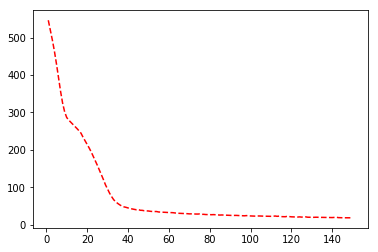

In [103]:
import matplotlib.pyplot as plt
training_loss = history4.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show()

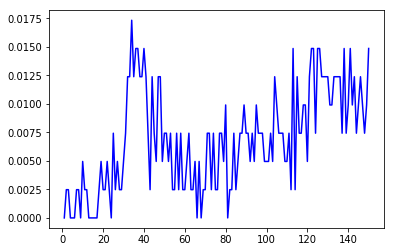

In [104]:
import matplotlib.pyplot as plt
training_loss = history4.history['acc']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'b-')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.